In [893]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random

In [894]:
#Model Variables and Parameters
age_average_x=20
# Current average ages in year for underground and overhead distribution lines (in years)
length_average_x=0.5
# Circuit length in mile for underground and overhead transission and distribution lines
number_circuit= 650
# Numbers showing different circuit in network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach circuit is about 25 miles in Larsen paper)
underground_2021=121
#Length of undergeound lines in miles in base year
overhead_line={'over_or_under':0,'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
underground_line={'over_or_under':1,'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
# over_or_under= Type of Line. x=0 for underground distribution lines and x=1 for overhead distribution lines
#lifespan=Useful lifespan of overhead line and underground lines (60 for overhead and 45 for underground)
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of T&D line 

In [895]:
shape_age_x=(age_average_x)/(((age_average_x)/2)**2)
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_age_x)

0.2


In [896]:
scale_age_x=(((age_average_x)/2)**2)/(age_average_x)
#scale of Gamma distribution required for simulating line circuits ages
print(scale_age_x)

5.0


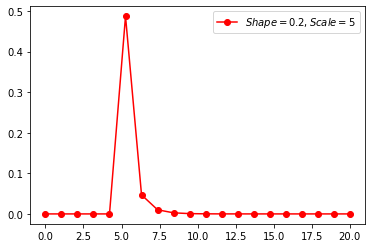

In [897]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_age_x, scale_age_x)

plt.plot(x, y, "ro-", label=(r'$Shape=0.2, Scale=5$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits ages

In [898]:
shape_length_x=length_average_x/(length_average_x/2)**2
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_length_x)

8.0


In [899]:
scale_length_x=(length_average_x/2)**2/length_average_x
#scale of Gamma distribution required for simulating line circuits ages
print(scale_length_x)

0.125


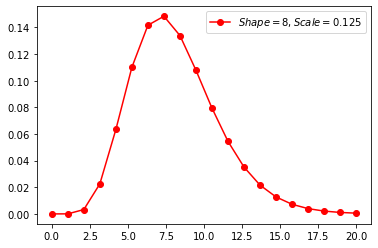

In [900]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_length_x, scale_length_x)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths

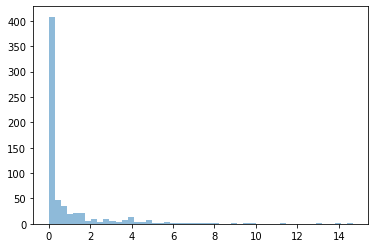

[2.61006166e-05 3.05683382e-01 3.48030386e-02 4.39163021e+00
 2.28803797e+00 1.62755770e-05 1.80657331e+00 1.66467495e-05
 4.02253143e-01 6.38140733e-04 4.82444927e-02 7.89798389e-03
 2.94498156e+00 2.08632690e-02 2.53747245e+00 1.07021959e-04
 1.08099309e+01 1.20659360e+00 7.21762991e-05 3.38316198e-01
 1.59204023e-02 3.12577556e-01 6.68800543e-01 8.06558316e-01
 1.14058820e-01 8.27505180e-06 1.43946913e-03 1.91863110e-02
 1.09870200e-01 2.55429223e-06 1.90786861e-04 4.29691805e+00
 2.58848138e+00 7.69052620e-03 6.88163799e-08 4.30759454e-06
 9.00125050e-01 3.36256330e-01 3.10977227e-01 1.53191736e-02
 2.34942811e+00 7.14159258e-06 1.46909141e+00 8.35658319e-03
 9.54157142e-03 9.75963680e-02 1.47385764e+00 1.29972822e+00
 9.21931907e-01 5.06360662e-02 6.34246901e-03 1.87573609e-02
 1.88792934e-02 5.29470663e-05 2.54060742e+00 2.36858532e-01
 1.72569490e+00 1.74690513e-02 1.17102782e-01 4.91891357e+00
 2.76955077e-02 1.93994176e-01 4.88384166e+00 9.57735184e-02
 1.39230789e-01 3.779012

In [901]:
age=np.random.gamma(shape_age_x,scale_age_x,number_circuit)
plt.hist(np.random.gamma(shape_age_x,scale_age_x,number_circuit),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined circuit's ages in the base year (2021)

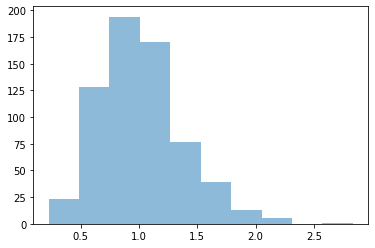

[1.01948886 0.60306793 0.93196736 1.78823661 0.86612566 1.03114503
 1.12200233 0.88395528 0.89416529 0.56601105 1.14310522 0.6739214
 1.05949594 1.17736777 1.30946447 1.37046031 1.09652125 0.50589285
 0.52588425 0.88232177 1.12325088 0.57290889 0.93559443 1.00725332
 0.77914591 1.12480981 0.77490592 1.27094883 0.58195618 0.64841719
 1.24034011 1.4275831  1.0228141  0.90354695 0.82766696 0.95206525
 1.19744149 0.7121534  0.71791461 1.02123614 1.16704626 1.30529187
 1.53507266 0.94716327 1.49930707 0.56237442 0.93708833 1.46333759
 0.81239853 0.95270103 0.62928737 2.32144408 0.89944453 0.66518401
 0.85629214 0.61564198 0.39933773 0.91235984 0.72661539 0.89898974
 1.72019898 1.03530077 1.34215462 0.95992351 0.98012289 1.44130735
 0.76490787 1.15318727 0.8053111  1.29179473 1.87800104 0.64166431
 0.66669395 0.66016886 1.11655744 1.1941782  0.73964716 0.79408995
 1.19370272 1.41719184 0.60913688 0.95004813 0.49149014 1.48234863
 0.55279265 1.15178457 1.13755967 1.83804263 1.44139402 0.86320

In [902]:
lengths=np.random.gamma(shape_length_x,scale_length_x,number_circuit)
plt.hist(np.random.gamma(shape_length_x,scale_length_x,number_circuit),alpha=0.5)
plt.show()
print (lengths)
#Randomly determined circuit's ages in the base year (2021)
### I guess these numbers are not correct because I do not expect to see such circuit's ages from a gamma distribution with an average age 20.

In [903]:
#class Circuit:
    #def __init__(self, length, age, x):
        #self.length=length
        #self.age=age
        #self.x=x
    
#circuit_1=Circuit(25,20,0)
#circuit_2=Circuit(24,21,1)
#circuit_3=Circuit(22,22,1)
#circuit_4=Circuit(18,18,0)
#circuit_5=Circuit(25,30,1)
#circuit_6=Circuit(36,19,0)
#circuit_7=Circuit(31,29,0)
#circuit_8=Circuit(29,27,1)
#circuit_9=Circuit(25,24,0)
#circuit_10=Circuit(27,26,0)

In [914]:
class Circuit:
###Lifecycle Infrastructure Costs:
    def whether_over_or_under(self):
        #random.seed(1)
        self.over_or_under=random.randint(0,1)
        return (self.over_or_under)
    # Randomly determining status of overhead or underground of circuit
    def get_random_age_2021(self):
        #random.seed(1)
        self.age= np.random.gamma(shape_age_x,scale_age_x)
        return (self.age)
    # Randomly determining circuit's ages in the base year (2021)
    def get_random_length_2021(self):
        #random.seed(1)
        self.length= np.random.gamma(shape_length_x,scale_length_x)
        return (self.length)
    # Randomly determining circuit's ages in the base year (2021)
###Three above methods are defined to identify lengh, age and overhead or underground, which are three atributes of a circuit.
    #def lifespan_over_or_under(self):
        #if self.over_or_under()==0:
            #lifespan_x= overhead_line['lifespan']
        #elif self.over_or_under()==1:
            #lifespan_x= underground_line['lifespan']
        #else:
            #lifespan_x=0
        #return (lifespan_x)
    #def replcost_x_over_or_under(self):
        #if self.over_or_under==0:
            #lifespan_x= overhead_line['lifespan']
        #if self.over_or_under==1:
            #lifespan_x= underground_line['lifespan']
        #print (lifespan_x)
###Above methods are for defining different parameters in the model subject to x=0(overhead) or x=1(underground)
    def age_circuit_i_t(self):
        over_or_under= self.whether_over_or_under()
        if over_or_under==0:
            lifespan_x= int(overhead_line['lifespan'])
        elif over_or_under==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            None
        age_i_2021=self.get_random_age_2021()
        if age_i_2021<=lifespan_x:
            age_i_t= (age_i_2021)+(t-2021)
        elif age_i_2021-lifespan_x==1:
            age_i_t=1
        elif age_i_2021-lifespan_x>1:
            age_i_t=(age_i_t)+1
        return(age_i_t)
    # Determining circuit's ages in year t
    def replcost_x_t(self):
        over_or_under= self.whether_over_or_under()
        if over_or_under==0:
            lifespan_x=overhead_line['lifespan']
            replecost_x=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        elif over_or_under==1:
            lifespan_x= underground_line['lifespan']
            replecost_x=underground_line['replcost']
            replcost_growth_rate_x= underground_line['replcost_growth_rate']
        else:
            lifespan_x=0
            replecost_x=0
            replcost_growth_rate_x=0
        for t in range (2021,underground_line['lifespan']):
            if t==2021:
                replcost_x_t= replecost_x
            else:
                replcost_x_t= (replecost_x)+(replcost_growth_rate_x)*(t-2021)*(replecost_x)
            return (replcost_x_t)
    #Determining replacement cost line x in time t
    def capex_StatusQuo_i(self):
        replcost_x_t=self.replcost_x_t()
        age_i_t=self.age_circuit_i_t()
        capex_StatusQuo_i=0
        for t in range (2021,underground_line['lifespan']):
            if age_i_t==1:
                capex_i=((rplcost_x_t)(age_i_t))/((1+r)^(t-2021))
                capex_StatusQuo_i=(capex_StatusQuo_i)+(capex_i)
            else:
                 capex_StatusQuo_i=0
            return (capex_StatusQuo_i)
    #Status quo capital expenses (CAPEX) occurring in future years (t) when the age of the circuit exceeds the expected useful lifespan
    def opex_x_t (self):
        over_or_under= self.whether_over_or_under()
        age_i_t=self.age_circuit_i_t()
        replcost_x_t=self.replcost_x_t()
        if over_or_under==0:
            om_percentage_replcost_x=overhead_line['om_percentage_replcost']
        elif over_or_under==1:
            om_percentage_replcost_x= underground_line['om_percentage_replcost']
        else:
            om_percentage_replcost_x=0
        for t in range (2021,underground_line['lifespan']):
            opex_x_t=0
            if age_i_t==1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
            elif age_i_t>1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t=(opex_x_t)+(om_percentage_replcost_x)*(replcost_x_t)
            else:
                None
            return (opex_x_t)
    #Annual operation and maintenance expenses for each line
    def opex_StatusQuo_i (self):
        opex_x_t=self.opex_x_t()
        length_i=self.get_random_length_2021()
        opex_StatusQuo_i=0
        for t in range (2021,underground_line['lifespan']):
            opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
            opex_StatusQuo_i=(opex_StatusQuo_i)+(opex_i)
        return (opex_StatusQuo_i)
    #Discounting annual O&M expenses incurred for each circuit 
    def lifecyclecost_StatusQuo(self):
        lifecyclecost_StatusQuo=0
        for i in range (number_circuit):
            capex_StatusQuo_i=self.capex_StatusQuo_i()
            opex_StatusQuo_i=self.opex_StatusQuo_i()
            lifecyclecost_i=capex_StatusQuo_i+opex_StatusQuo_i
            lifecyclecost_StatusQuo=lifecyclecost_StatusQuo+lifecyclecost_i
        return (lifecyclecost_StatusQuo)
    #Total lifecycle costs, under the status quo
###Above methods are required methods for determining lifecycle costs associated with status quo
    def first_retire_i(self):
        age_2021_i=self.get_random_age_2021()
        over_or_under= self.whether_over_or_under()
        if over_or_under==0:
            lifespan_x=overhead_line['lifespan']
        elif over_or_under==1:
            lifespan_x= underground_line['lifespan']
        else:
            lifespan_x=0
        first_retire_i=(lifespan_x)-(age_2021_i)+2021
        return (first_retire_i)
    #Determining the first retirement year Under the undergrounding alternative
    def capex_underground_i(self):
        over_or_under= self.whether_over_or_under()
        if over_or_under==0:
            over_or_under=1
        length_i=self.get_random_length_2021()
        capex_underground_i=0
        rplcost_x_t=self.replcost_x_t()
        for t in range (2021,underground_line['lifespan']):
            capex_i=((rplcost_x_t)(length_i))/((1+r)^(t-2021))
            capex_underground_i=(capex_underground_i)+(capex_i)
        return (capex_StatusQuo_i)
    #Undergrounding capital expenses
    def opex_underground_i (self):
        over_or_under= self.whether_over_or_under()
        opex_x_t=self.opex_x_t()
        length_i=self.get_random_length_2021()
        first_retire_i=self.first_retire_i()
        opex_underground_i=0
        for t in range (2021,underground_line['lifespan']):
            if  over_or_under==1:
                opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                opex_underground_i=(opex_underground_i)+(opex_i)
            else:        
                if t< first_retire_i:
                    opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                    opex_underground_i=(opex_underground_i)+(opex_i)
                else:
                    over_or_under==1
                    opex_x_t=self.opex_x_t()
                    opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                    opex_underground_i=(opex_underground_i)+(opex_i)
        return (opex_underground_i)
    #Annual operation and maintenance expenses for each line Under the undergrounding alternative
    def lifecyclecost_underground(self):
        lifecyclecost_underground=0
        for i in range (number_circuit):
            capex_underground_i=self.capex_underground_i()
            opex_underground_i=self.opex_underground_i()
            lifecyclecost_i= capex_underground_i+opex_underground_i
            lifecyclecost_underground=lifecyclecost_underground+lifecyclecost_i
        return (lifecyclecost_underground)
    #Total lifecycle costs, under the underground alternative.
###Above methods are required methods for determining lifecycle costs associated with underground alternative.
    def underground_t(self):
        first_retire_i=self.first_retire_i()
        length_i=self.get_random_length_2021()
        for t in range (2021,underground_line['lifespan']):
            if t>= first_retire_i:
                sumlength=0
                for i in range (number_circuit):
                    sumlength=sumlength+length_i
                    return (sumlength)
                underground_t=underground_2021+sumlength
            else:
                underground_t=underground_2021
        return(underground_t)
    #Determining future annual underground line mileage
    def lifecycle_net(self):
        lifecyclecost_underground=self.lifecyclecost_underground()
        lifecyclecost_StatusQuo=self.lifecyclecost_StatusQuo()
        lifecycle_net=lifecyclecost_underground-lifecyclecost_StatusQuo
    #Determining the additional lifecycle costs due to undergrounding                    
###Ecosystem-related Restoration Costs:
    def restoration_statusQuo(self):
        for t in range (2021,underground_line['lifespan']):
            for i in range (number_circuit):
                sum_lengh_i_t=0
                length_i_t= self.get_random_length_2021()
                sum_lengh_i_t=sum_lengh_i_t+length_i_t
            return (length_i_t)
###Construction-related Morbidity and Mortality Costs:
       

In [915]:
for i in range (number_circuit):
    circuit_i=Circuit()
    circuit_over_or_under=circuit_i.whether_over_or_under()
    #print(circuit_over_or_under)
    circuit_age_2021=circuit_i.get_random_age_2021()
    #print (circuit_age_2021)
    for t in range (2021,underground_line['lifespan']):
        circuit_age_i_t_list=[]
        age_i_t=circuit_i.age_circuit_i_t()
        circuit_age_i_t_list=circuit_age_i_t_list.append(age_i_t)
        #print(circuit_age_i_t_list)
    print('x=',circuit_over_or_under,'&','Segment age in 2021=',circuit_age_2021,'&','Segment age in t=',circuit_age_i_t_list)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know why i just get circuit_age_i_t_list=[] in the output. I expected to see t numbers of ages in that list. one per each year.
# I do not know how I can change produced x in a way to produce 66% x=0 and 44% x=1.

x= 1 & Segment age in 2021= 0.4132553292339576 & Segment age in t= []
x= 0 & Segment age in 2021= 0.951887514338019 & Segment age in t= []
x= 1 & Segment age in 2021= 0.32842986223316095 & Segment age in t= []
x= 1 & Segment age in 2021= 0.004926130757564939 & Segment age in t= []
x= 1 & Segment age in 2021= 0.0415667376928441 & Segment age in t= []
x= 0 & Segment age in 2021= 0.0027832440611183468 & Segment age in t= []
x= 0 & Segment age in 2021= 2.0365450319146645 & Segment age in t= []
x= 1 & Segment age in 2021= 4.6129939045371526e-07 & Segment age in t= []
x= 1 & Segment age in 2021= 0.08288966113982477 & Segment age in t= []
x= 0 & Segment age in 2021= 3.558062284161094 & Segment age in t= []
x= 0 & Segment age in 2021= 0.10233266516026322 & Segment age in t= []
x= 0 & Segment age in 2021= 7.113174406786534e-09 & Segment age in t= []
x= 1 & Segment age in 2021= 0.7725432486689687 & Segment age in t= []
x= 1 & Segment age in 2021= 0.7050727599863961 & Segment age in t= []
x= 0 & 

x= 1 & Segment age in 2021= 0.18861331189406166 & Segment age in t= []
x= 0 & Segment age in 2021= 0.000977657272401211 & Segment age in t= []
x= 0 & Segment age in 2021= 0.13676648509834063 & Segment age in t= []
x= 0 & Segment age in 2021= 0.0023441957970217826 & Segment age in t= []
x= 0 & Segment age in 2021= 0.13011496440390702 & Segment age in t= []
x= 1 & Segment age in 2021= 0.001647707373016259 & Segment age in t= []
x= 0 & Segment age in 2021= 1.2381193672997277 & Segment age in t= []
x= 1 & Segment age in 2021= 0.12381376193472654 & Segment age in t= []
x= 0 & Segment age in 2021= 0.001898460117898692 & Segment age in t= []
x= 0 & Segment age in 2021= 0.0007185715955991156 & Segment age in t= []
x= 1 & Segment age in 2021= 0.9956592940730191 & Segment age in t= []
x= 0 & Segment age in 2021= 0.15169978504403211 & Segment age in t= []
x= 1 & Segment age in 2021= 2.592148184020643e-06 & Segment age in t= []
x= 0 & Segment age in 2021= 2.30913106946467 & Segment age in t= []
x=

x= 0 & Segment age in 2021= 2.4673797299627958 & Segment age in t= []
x= 0 & Segment age in 2021= 0.015439366932304487 & Segment age in t= []
x= 0 & Segment age in 2021= 2.0133710993541105 & Segment age in t= []
x= 1 & Segment age in 2021= 0.2580268659768576 & Segment age in t= []
x= 0 & Segment age in 2021= 0.00016451866590410844 & Segment age in t= []
x= 0 & Segment age in 2021= 0.39757182250286877 & Segment age in t= []
x= 1 & Segment age in 2021= 0.0007154497847403089 & Segment age in t= []
x= 1 & Segment age in 2021= 0.0017999119907048263 & Segment age in t= []
x= 0 & Segment age in 2021= 0.8879789708602559 & Segment age in t= []
x= 1 & Segment age in 2021= 0.8778141057784061 & Segment age in t= []
x= 1 & Segment age in 2021= 0.021369128003453065 & Segment age in t= []
x= 0 & Segment age in 2021= 0.034023290754958385 & Segment age in t= []
x= 0 & Segment age in 2021= 8.902172398022679e-14 & Segment age in t= []
x= 0 & Segment age in 2021= 11.501705253990455 & Segment age in t= []


In [916]:
for i in range (number_circuit):
    circuit_i=Circuit()
    replcost_x_t_i=circuit_i.replcost_x_t()
    print(replcost_x_t_i)
    capex_StatusQuo_i=circuit_i.capex_StatusQuo_i()
    print(capex_StatusQuo_i)
    opex_x_t=circuit_i.opex_x_t()
    print(opex_x_t)
    opex_StatusQuo_i=circuit_i.opex_StatusQuo_i()
    print(opex_StatusQuo_i)
    lifecyclecost_StatusQuo=circuit_i.lifecyclecost_StatusQuo()
    print(lifecyclecost_StatusQuo)
# Test producing replacement cost_xt, capex_StatusQuo_i, opex_x_t, opex_StatusQuo and lifecyclecost_StatusQuo for a circuite using class methods related to status quo.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

None
None
None
0


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [917]:
for i in range (number_circuit):
    circuit_i=Circuit()
    first_retire_i=circuit_i.first_retire_i()
    print(first_retire_i)
    capex_underground_i=circuit_i.capex_underground_i()
    print(capex_underground_i)
    opex_underground_i=circuit_i.opex_underground_i()
    print(opex_underground_i)
    lifecyclecost_underground=circuit_i.lifecyclecost_underground()
    print(ifecyclecost_underground)
    underground_t=circuit_i.underground_t()
    print(underground_t)
# Test producing first_retire_i, capex_underground_i, opex_underground_i, ifecyclecost_underground and underground_t for a circuite using class methods related to undergrounding alternative.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

2065.990949516553
None
0


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'